K-Means Tutorial
===

K-means is an example of unsupervised learning through clustering. It tries to separate unlabeled data into clusters with equal variance. In two dimensions, this can be visualized as grouping data using circular areas of equal radius.

There are three steps training a K-means classifier: 

1. Pick how many groups you want it to use and (randomly) assign a starting centroid (center point) to each cluster.
2. Assign each data point to the group with the closest centroid.
3. Find the mean value of each feature (the middle point of the cluster) for all the points assinged to each cluster. This is the new centroid for that cluster.

Steps 2 and 3 repeat until the cluster centroids do not move significantly.

Scikit-learn provides more information on the K-means classifier function [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). They also have an examples of using K-means to [classify handwritten numbers](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#example-cluster-plot-kmeans-digits-py).


Setup
===
Tell matplotlib to print figures in the notebook. Then import numpy (for numerical data), pyplot (for plotting figures) ListedColormap (for plotting colors), kmeans (for the scikit-learn kmeans algorithm) and datasets (to download the iris dataset from scikit-learn).

Also create the color maps to use to color the plotted data, and "labelList", which is a list of colored rectangles to use in plotted legends.

In [1]:
# Print figures in the notebook
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets # Import the dataset from scikit-learn
from sklearn.cluster import KMeans # Import the KMeans classifier

# Import patch for drawing rectangles in the legend
from matplotlib.patches import Rectangle

# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_bg = ListedColormap(['#333333', '#666666', '#999999'])

# Create a legend for the colors, using rectangles for the corresponding colormap colors
labelList = []
for color in cmap_bold.colors:
    labelList.append(Rectangle((0, 0), 1, 1, fc=color))

Import the dataset
===
Import the dataset and store it to a variable called iris. Scikit-learn's explanation of the dataset is [here](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). This dataset is similar to a python dictionary, with the keys: ['DESCR', 'target_names', 'target', 'data', 'feature_names']

The data features are stored in iris.data, where each row is an example from a single flower, and each column is a single feature. The feature names are stored in iris.feature_names. Labels are stored as the numbers 0, 1, or 2 in iris.target, and the names of these labels are in iris.target_names.

The dataset consists of measurements made on 50 examples from each of three different species of iris flowers (Setosa, Versicolour, and Virginica). Each example has four features (or measurements): [sepal](http://en.wikipedia.org/wiki/Sepal) length, sepal width, [petal](http://en.wikipedia.org/wiki/Petal) length, and petal width. All measurements are in cm.

Below, we load the labels into y, the corresponding label names into labelNames, the data into X, and the names of the features into featureNames.

In [2]:
# Import some data to play with
iris = datasets.load_iris()

# Store the labels (y), label names, features (X), and feature names
y = iris.target       # Labels are stored in y as numbers
labelNames = iris.target_names # Species names corresponding to labels 0, 1, and 2
X = iris.data
featureNames = iris.feature_names

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Below, we plot the first two features from the dataset (sepal length and width). Normally we would try to use all useful features, but sticking with two allows us to visualize the data more easily.

Then we plot the data to get a look at what we're dealing with. The colormap is used to determine what colors are used for each class when plotting.

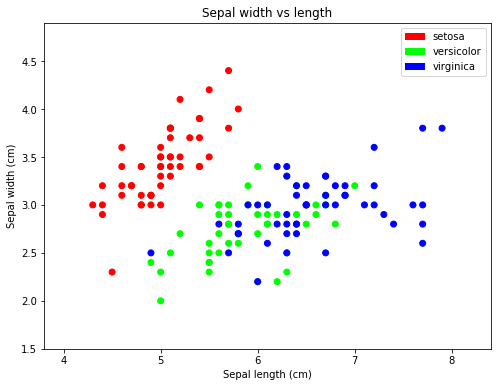

In [4]:
from ml_util import plot_iris_scatter
# Plot the data
# Sepal length and width
X_sepal = X[:,:2]
plot_iris_scatter(X_sepal, y, list(labelNames))

## Unlabeled data - as K-Means sees the data

K-means is an unsupervised learning method, which means it doesn't make use of data labels. This is useful when we're exploring a new dataset. We may not have labels for this dataset, but we want to see how it is grouped together and what examples are most similar to each other. Below we plot the data again, but this time without any labels. This is what k-means "sees" when we use it.

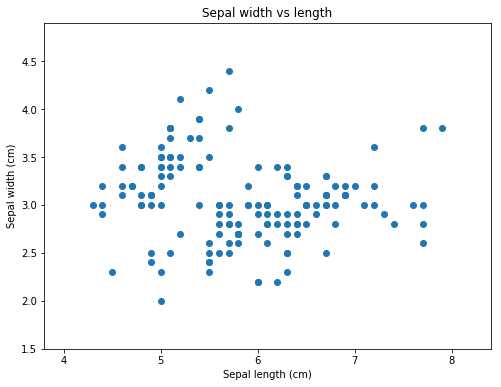

In [5]:
plot_iris_scatter(X_sepal, None, target_names=None)

K-means: training
===
Next, we train a K-means classifier on our data. 

The first section chooses the number of clusters to use, and stores it in the variable n_clusters. We choose 3 because we know there are 3 species of iris, but we don't always know this when approaching a machine learning problem. 

The last two lines create and train the classifier. 

The first line creates a classifier (kmeans) using the [KMeans()](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function, and tells it to use the number of neighbors stored in n_neighbors. The second line uses the fit() method to train the classifier on the features in X. Notice that because this is an unsupervised method, it does not use the labels stored in y.

In [6]:
# Choose your number of clusters
n_clusters = 3

# we create an instance of KMeans Classifier and fit the data.
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_sepal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Plot the classification boundaries
===
Now that we have our classifier, let's visualize what it's doing. 

First we plot the decision boundaries, or the lines dividing areas assigned to the different clusters. The background shows the areas that are considered to belong to a certain cluster, and each cluster can then be assigned to a species of iris. They are plotted in grey, because the classifier does not assign labels to the clusters. The center of each cluster is plotted as a black x. Then we plot our examples onto the space, showing where each point lies in relation to the decision boundaries.

If we took sepal measurements from a new flower, we could plot it in this space and use the background shade to determine which cluster of data points our classifier would assign to it.

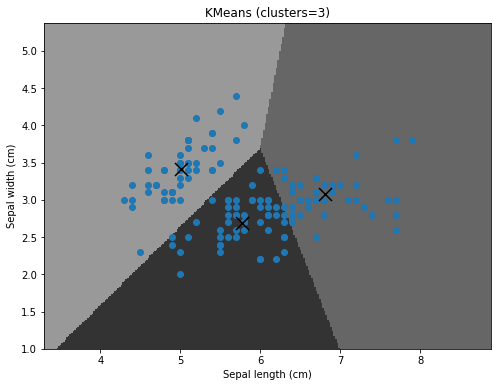

In [7]:
from ml_util import plot_kmeans_boundaries, cmap_bg

plot_kmeans_boundaries(kmeans, X_sepal)

Cheating with labels
---
Because we do have labels for this dataset, let's see how well k-means did at separating the three species.

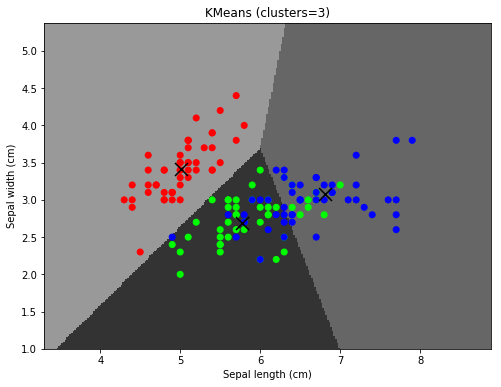

In [8]:
from ml_util import cmap_bg, cmap_bold
plot_kmeans_boundaries(kmeans, X_sepal, y, cmaps=[cmap_bg, cmap_bold])

Analyzing the clusters
===

As you can see in the previous plots, K-means does a good job of separating the Setosa species (red) into its own cluster. It also does a reasonable job separating Versicolour (green) and Virginica (blue), although there is a considerable amount of overlap that it can't predict properly.

This is an example where it is important to understand your data (and visualize it whenever possible), as well as understand your machine learning model. In this example, you may want to use a different machine learning model that can separate the data more accurately. Alternatively, we could use all four features to see if that improves accuracy (remember, we aren't using petal length or width here for easier data visualization).

Changing the number of clusters
---
What would happen if you changed the number of clusters? What would the plot look like with 2 clusters, or 5? Based on the unlabeled data, how would you try to determine the number of classes to use?

In the next block of code, try changing the number of clusteres and seeing what happens. You may need to change the number of colors represented in cmap_bg to match the number of classes you are using.

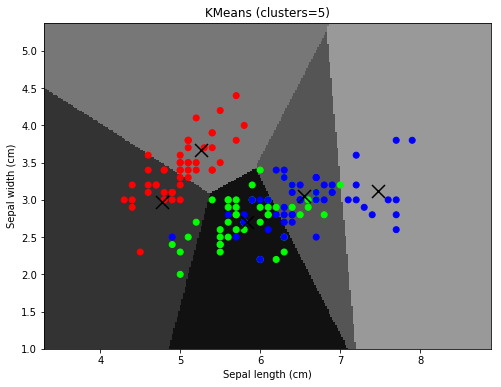

In [9]:
cmap_bg_5 = ListedColormap(['#111111','#333333', '#555555', '#777777', '#999999'])
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_sepal)
plot_kmeans_boundaries(kmeans, X_sepal, y, cmaps=[cmap_bg_5, cmap_bold], title='KMeans (clusters=5)')

Making Predictions
===

Now, let's say we go out and measure the sepals of two iris plants, and want to know what group they belong to. We're going to use our classifier to predict the flowers with the following measurements:

Plant | Sepal length | Sepal width
------|--------------|------------
A     |4.3           |2.5
B     |6.3           |2.1

We can use our classifier's [predict()](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function to predict the label for our input features. We pass in the variable examples to the predict() function, which is a list, and each element is another list containing the features (measurements) for a particular example. The output is a list of labels corresponding to the input examples.

We'll also plot them on the boundary plot, to show why they were predicted that way.

In [10]:
# Add our new data examples
examples = [[4.3, 2.5], # Plant A
            [6.3, 2.1]] # Plant B

# Choose your number of clusters
n_clusters = 3

# we create an instance of KMeans Classifier and fit the data.
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_sepal)

# Predict the labels for our new examples
labels = kmeans.predict(examples)

# Print the predicted species names
print('A: Cluster ' + str(labels[0]))
print('B: Cluster ' + str(labels[1]))

A: Cluster 0
B: Cluster 2


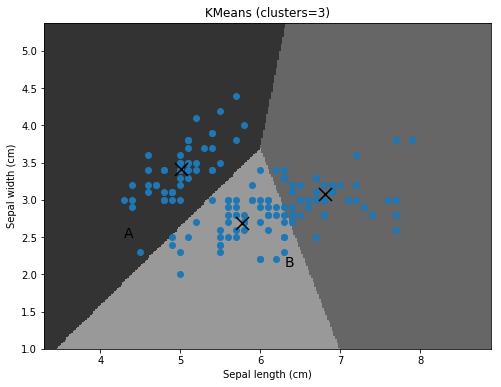

In [11]:
plot_kmeans_boundaries(kmeans, X_sepal, None, cmaps=[cmap_bg, cmap_bold], title='KMeans (clusters=3)', samples=examples)

As you can see, example A is grouped into Cluster 2 and example B is grouped into Cluster 0. Remember, K-means does not use labels. It only clusters the data by feature similarity, and it's up to us to decide what the clusters mean (or if they don't mean anything at all).

### Make predictions on the entire data set with K-Means


In [12]:
# Add our new data examples
examples = [[4.3, 2.5, 1.2, 0.2], # Plant A
            [6.9, 3.1, 5.1, 2.2]] # Plant B virginica

# Choose your number of clusters
n_clusters = 3

# we create an instance of KMeans Classifier and fit the data.
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Predict the labels for our new examples
labels = kmeans.predict(examples)

# Print the predicted species names
print('A: Cluster ' + str(labels[0]))
print('B: Cluster ' + str(labels[1]))

A: Cluster 0
B: Cluster 2


Final Notes
===

Some final things to keep in mind when using K-means to cluster your data

* K-means is unsupervised, meaning it clusters data by similarity of features and does not require (or even use) labels.
* How well it works is partially dependent on choosing the right number of clusters for the dataset. You can do this using your knowledge of the data (like we did, knowing we are looking at 3 species of plant). Alternatively, there are ways to try to experimentally find the best number of clusters.
* The output does not provide a meaningful label, only a cluster assignment for the data. It is up to you to determine the meaning of each cluster.